1. Зберіть усі дані з папки data в один датафрем, що має наступні стовпці: колонки із самих файлів (product_id, quantity), а також ім'я користувача (name), і дата цих покупок (date, відповідає назві папки, де лежить папка з користувачем)

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir(r'C:\Users\m.semchenko\Documents\data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [3]:
path = r'C:\Users\m.semchenko\Documents\data'

In [4]:
# Створюю df для всіх даних
df = pd.DataFrame()

# Зчитую дані з усіх файлів і додаю їх до загального df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Створюю повний шлях до файлу
        data_path = f'{current_path}/{file}'
        
        # Зчитую дані
        temp_df = pd.read_csv(data_path)
        
        # Витягую назву та дату
        path_part = current_path.split('\\')
        date = path_part[-2]
        name = path_part[-1]
        
        # Додаю стовпці з датою та назвою
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Вставляю дані в основний df
        df = pd.concat((df, temp_df))

In [5]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
1,1,66,4,2020-12-09,Rostislav_Petrov
2,2,39,2,2020-12-09,Rostislav_Petrov
0,0,82,4,2020-12-09,Vasiliy_Ivanov
1,1,74,2,2020-12-09,Vasiliy_Ivanov


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [9]:
df.quantity.sum()

480

2. З'ясуйте, який користувач купив найбільше товарів. Якщо їх кілька, то перерахуйте імена через кому з пробілом та в алфавітному порядку.

In [10]:
df.groupby('name') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head()

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28


3. Знайдіть топ-10 товарів за кількістю проданих одиниць за весь час та побудуйте барплот. Скільки було продано одиниць товару з product_id==56?

In [11]:
top10_product = df.groupby('product_id', as_index=False) \
                .agg({'quantity': 'sum'}) \
                .sort_values('quantity', ascending=False) \
                .head(10)

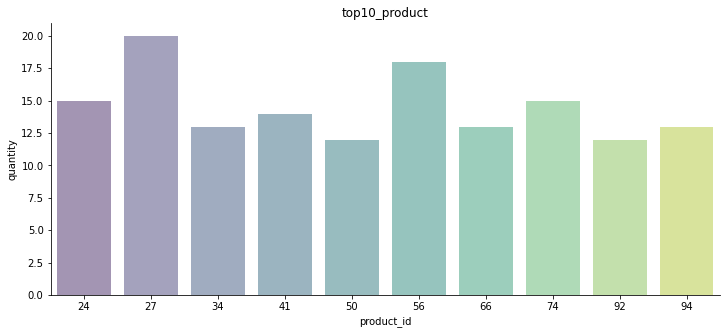

In [12]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top10_product \
            ,x='product_id' \
            ,y='quantity' \
            ,palette='viridis' \
            ,alpha=0.5 \
           )
plt.title('top10_product')
sns.despine()

4. Візуалізуйте продажі по дням.

In [13]:
sales = df.groupby('date', as_index=False) \
            .agg({'quantity': 'sum'})

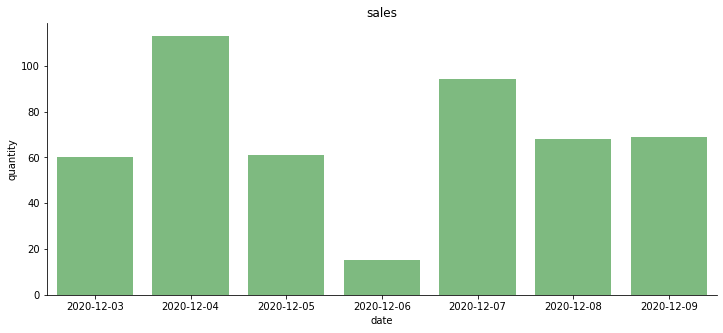

In [14]:
plt.figure(figsize=(12, 5))
sns.barplot(data=sales \
            ,x='date' \
            ,y='quantity' \
            ,color='#74c476' \
           )
plt.title('sales')
sns.despine()

5. Скільки користувачів придбали якийсь товар повторно (більше 1 разу)? Повторно вважатимемо покупку товару з однаковим product_id, здійснену в різні дні.

In [15]:
df.groupby(['name','product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .rename(columns={'date': 'count_quantity'}) \
    .query('count_quantity > 1')

,,count_quantity
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
